# VirtualSky

In [45]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_excel('../data/VirtualSky.Diff.Irr.Lb.Hb.0_256.xlsx')

In [3]:
LED_labels = data.loc[0]
LED_labels = LED_labels[LED_labels.notnull()].to_list()
#data_labels

In [4]:
setting_labels = (data.iloc[1, 1:]).to_list()

In [5]:
data = data.iloc[2:]

In [6]:
data = data.set_index('HB')
data.index.name = 'Wavelengths'

In [7]:
data = data.T.reset_index(drop=True)
data['Primary'] = LED_labels
data['Setting'] = setting_labels

In [8]:
data = data.replace({'B':0,'G':1,'R':2,'W':3})

In [9]:
data = data.set_index(['Primary', 'Setting'])


In [10]:
settings = [val for val in range(1,101)]
new = [val for four in zip(settings, settings, settings, settings) for val in four]

In [11]:
data = data.reset_index()

In [12]:
data['Setting'] = new

In [13]:
data = data.set_index(['Primary','Setting'])
data

,Wavelengths,380,381,382,383,384,385,386,387,388,389,...,771,772,773,774,775,776,777,778,779,780
Primary,Setting,,,,,,,,,,,,,,,,,,,,,
0,1,5.920000e-07,2.490000e-07,0.000000e+00,0.000000e+00,1.740000e-07,4.350000e-07,7.830000e-07,8.310000e-07,2.300000e-07,0.000000e+00,...,1.590000e-05,0.000018,0.000019,0.000021,0.000022,0.000024,0.000027,2.960000e-05,0.000033,0.000037
1,1,5.300000e-08,0.000000e+00,0.000000e+00,0.000000e+00,5.220000e-07,1.300000e-06,5.240000e-07,0.000000e+00,0.000000e+00,0.000000e+00,...,1.450000e-05,0.000016,0.000018,0.000020,0.000022,0.000024,0.000027,2.840000e-05,0.000032,0.000036
2,1,3.580000e-06,2.110000e-06,2.870000e-06,1.020000e-05,8.300000e-06,6.870000e-07,2.030000e-07,3.200000e-07,2.850000e-07,1.830000e-07,...,1.710000e-05,0.000017,0.000019,0.000021,0.000023,0.000026,0.000029,3.030000e-05,0.000032,0.000035
3,1,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,1.740000e-05,0.000019,0.000021,0.000022,0.000024,0.000026,0.000029,3.230000e-05,0.000035,0.000037
0,2,0.000000e+00,6.180000e-07,8.930000e-07,2.700000e-07,0.000000e+00,0.000000e+00,0.000000e+00,1.710000e-07,8.320000e-07,1.270000e-06,...,1.730000e-05,0.000020,0.000019,0.000021,0.000024,0.000026,0.000028,3.110000e-05,0.000033,0.000036
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3,99,4.210000e-06,2.300000e-05,3.570000e-05,3.250000e-05,4.350000e-05,6.220000e-05,5.270000e-05,4.390000e-05,3.610000e-05,3.790000e-05,...,1.300000e-04,0.000128,0.000123,0.000121,0.000122,0.000117,0.000115,1.140000e-04,0.000106,0.000099
0,100,3.240000e-04,1.600000e-04,4.250000e-05,1.280000e-05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,5.820000e-07,0.000002,0.000004,0.000005,0.000006,0.000007,0.000005,8.150000e-07,0.000020,0.000034
1,100,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.270000e-06,3.100000e-06,8.580000e-07,9.970000e-07,...,1.370000e-06,0.000003,0.000002,0.000007,0.000016,0.000008,0.000005,9.430000e-06,0.000007,0.000004


In [15]:
new = pd.melt(data, ignore_index=False).reset_index()

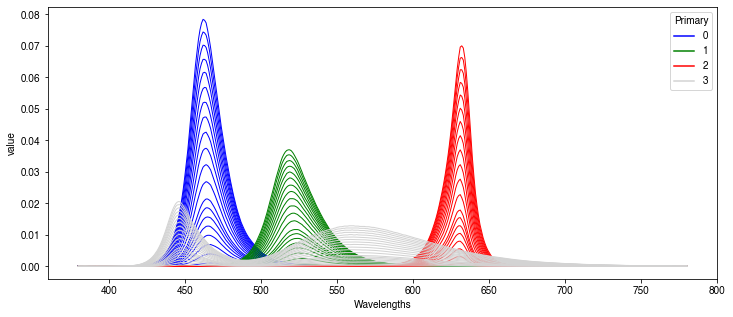

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

test = new[::5].copy()
#test.loc[:, 'Setting'] = test.loc[:, 'Setting'] * 13
test = test.sort_values(['Primary','Setting'])


fig, ax = plt.subplots(figsize=(12,5))

sns.lineplot(data=test, x='Wavelengths', y='value', 
             hue='Primary', units='Setting', 
             palette=['blue', 'green', 'red', 'lightgray'], 
             estimator=None, lw=1, ax=ax)

fig.savefig('vs_test.svg')

In [29]:
test = test.pivot(index=['Primary', 'Setting'], columns='Wavelengths')

In [61]:
test = test.droplevel(axis=1, level=0)
test

Wavelengths           380           381           382           383  \
0 13         5.920000e-07  2.490000e-07  0.000000e+00  0.000000e+00   
  26         0.000000e+00  7.900000e-07  1.140000e-06  3.450000e-07   
  39         0.000000e+00  6.860000e-07  9.930000e-07  3.000000e-07   
  52         3.760000e-05  3.350000e-05  2.580000e-05  8.930000e-06   
  65         0.000000e+00  2.500000e-06  3.610000e-06  1.090000e-06   
...                   ...           ...           ...           ...   
3 208        8.710000e-05  7.950000e-05  7.780000e-05  8.600000e-05   
  221        1.320000e-07  0.000000e+00  0.000000e+00  0.000000e+00   
  234        9.550000e-05  7.480000e-05  5.690000e-05  4.270000e-05   
  247        9.810000e-05  5.110000e-05  2.530000e-05  5.610000e-05   
  260        4.210000e-06  2.300000e-05  3.570000e-05  3.250000e-05   

Wavelengths           384           385           386           387  \
0 13         1.740000e-07  4.350000e-07  7.830000e-07  8.310000e-07   
  26         0.000000e+00  0.000000e+00  5.190000e-07  1.040000e-06   
  39         0.000000e+00  0.000000e+00  0.000000e+00  2.860000e-07   
  52         1.530000e-06  1.390000e-06  1.140000e-06  8.360000e-07   
  65         0.000000e+00  0.000000e+00  0.000000e+00  1.730000e-07   
...                   ...           ...           ...           ...   
3 208        8.460000e-05  7.720000e-05  5.300000e-05  3.760000e-05   
  221        1.730000e-06  4.330000e-06  2.750000e-06  1.380000e-06   
  234        4.550000e-05  5.890000e-05  2.820000e-05  1.090000e-05   
  247        6.850000e-05  6.720000e-05  6.100000e-05  4.910000e-05   
  260        4.350000e-05  6.220000e-05  5.270000e-05  4.390000e-05   

Wavelengths           388           389  ...       771       772       773  \
0 13         2.300000e-07  0.000000e+00  ...  0.000016  0.000018  0.000019   
  26         1.790000e-06  1.520000e-06  ...  0.000020  0.000022  0.000020   
  39         1.390000e-06  1.220000e-06  ...  0.000011  0.000013  0.000015   
  52         2.310000e-07  0.000000e+00  ...  0.000015  0.000021  0.000020   
  65         8.410000e-07  7.400000e-07  ...  0.000015  0.000016  0.000021   
...                   ...           ...  ...       ...       ...       ...   
3 208        3.340000e-05  4.240000e-05  ...  0.000097  0.000095  0.000093   
  221        3.820000e-07  7.990000e-06  ...  0.000108  0.000106  0.000102   
  234        1.950000e-05  3.310000e-05  ...  0.000120  0.000117  0.000110   
  247        1.690000e-05  1.160000e-05  ...  0.000123  0.000118  0.000119   
  260        3.610000e-05  3.790000e-05  ...  0.000130  0.000128  0.000123   

Wavelengths       774       775       776       777       778       779  \
0 13         0.000021  0.000022  0.000024  0.000027  0.000030  0.000033   
  26         0.000023  0.000029  0.000025  0.000024  0.000028  0.000028   
  39         0.000019  0.000025  0.000025  0.000026  0.000028  0.000031   
  52         0.000018  0.000016  0.000024  0.000030  0.000031  0.000029   
  65         0.000021  0.000019  0.000022  0.000025  0.000030  0.000031   
...               ...       ...       ...       ...       ...       ...   
3 208        0.000093  0.000093  0.000088  0.000084  0.000079  0.000079   
  221        0.000097  0.000090  0.000093  0.000096  0.000097  0.000095   
  234        0.000105  0.000101  0.000100  0.000097  0.000091  0.000093   
  247        0.000116  0.000110  0.000106  0.000103  0.000101  0.000098   
  260        0.000121  0.000122  0.000117  0.000115  0.000114  0.000106   

Wavelengths       780  
0 13         0.000037  
  26         0.000028  
  39         0.000034  
  52         0.000028  
  65         0.000032  
...               ...  
3 208        0.000079  
  221        0.000093  
  234        0.000094  
  247        0.000094  
  260        0.000099  

[80 rows x 401 columns]

In [42]:
idx = pd.MultiIndex.from_product([range(4), range(13, 261, 13)])

In [43]:
test.index = idx
test

value                                            \
Wavelengths           380           381           382           383   
0 13         5.920000e-07  2.490000e-07  0.000000e+00  0.000000e+00   
  26         0.000000e+00  7.900000e-07  1.140000e-06  3.450000e-07   
  39         0.000000e+00  6.860000e-07  9.930000e-07  3.000000e-07   
  52         3.760000e-05  3.350000e-05  2.580000e-05  8.930000e-06   
  65         0.000000e+00  2.500000e-06  3.610000e-06  1.090000e-06   
...                   ...           ...           ...           ...   
3 208        8.710000e-05  7.950000e-05  7.780000e-05  8.600000e-05   
  221        1.320000e-07  0.000000e+00  0.000000e+00  0.000000e+00   
  234        9.550000e-05  7.480000e-05  5.690000e-05  4.270000e-05   
  247        9.810000e-05  5.110000e-05  2.530000e-05  5.610000e-05   
  260        4.210000e-06  2.300000e-05  3.570000e-05  3.250000e-05   

                                                                     \
Wavelengths           384           385           386           387   
0 13         1.740000e-07  4.350000e-07  7.830000e-07  8.310000e-07   
  26         0.000000e+00  0.000000e+00  5.190000e-07  1.040000e-06   
  39         0.000000e+00  0.000000e+00  0.000000e+00  2.860000e-07   
  52         1.530000e-06  1.390000e-06  1.140000e-06  8.360000e-07   
  65         0.000000e+00  0.000000e+00  0.000000e+00  1.730000e-07   
...                   ...           ...           ...           ...   
3 208        8.460000e-05  7.720000e-05  5.300000e-05  3.760000e-05   
  221        1.730000e-06  4.330000e-06  2.750000e-06  1.380000e-06   
  234        4.550000e-05  5.890000e-05  2.820000e-05  1.090000e-05   
  247        6.850000e-05  6.720000e-05  6.100000e-05  4.910000e-05   
  260        4.350000e-05  6.220000e-05  5.270000e-05  4.390000e-05   

                                         ...                                \
Wavelengths           388           389  ...       771       772       773   
0 13         2.300000e-07  0.000000e+00  ...  0.000016  0.000018  0.000019   
  26         1.790000e-06  1.520000e-06  ...  0.000020  0.000022  0.000020   
  39         1.390000e-06  1.220000e-06  ...  0.000011  0.000013  0.000015   
  52         2.310000e-07  0.000000e+00  ...  0.000015  0.000021  0.000020   
  65         8.410000e-07  7.400000e-07  ...  0.000015  0.000016  0.000021   
...                   ...           ...  ...       ...       ...       ...   
3 208        3.340000e-05  4.240000e-05  ...  0.000097  0.000095  0.000093   
  221        3.820000e-07  7.990000e-06  ...  0.000108  0.000106  0.000102   
  234        1.950000e-05  3.310000e-05  ...  0.000120  0.000117  0.000110   
  247        1.690000e-05  1.160000e-05  ...  0.000123  0.000118  0.000119   
  260        3.610000e-05  3.790000e-05  ...  0.000130  0.000128  0.000123   

                                                                         \
Wavelengths       774       775       776       777       778       779   
0 13         0.000021  0.000022  0.000024  0.000027  0.000030  0.000033   
  26         0.000023  0.000029  0.000025  0.000024  0.000028  0.000028   
  39         0.000019  0.000025  0.000025  0.000026  0.000028  0.000031   
  52         0.000018  0.000016  0.000024  0.000030  0.000031  0.000029   
  65         0.000021  0.000019  0.000022  0.000025  0.000030  0.000031   
...               ...       ...       ...       ...       ...       ...   
3 208        0.000093  0.000093  0.000088  0.000084  0.000079  0.000079   
  221        0.000097  0.000090  0.000093  0.000096  0.000097  0.000095   
  234        0.000105  0.000101  0.000100  0.000097  0.000091  0.000093   
  247        0.000116  0.000110  0.000106  0.000103  0.000101  0.000098   
  260        0.000121  0.000122  0.000117  0.000115  0.000114  0.000106   

                       
Wavelengths       780  
0 13         0.000037  
  26         0.000028  
  39         0.000034  
  52         0.000028  
  65         0.000032  
...          

In [55]:
dark = pd.DataFrame(np.zeros((4, 401)))
idx = pd.MultiIndex.from_product([range(4), [0]])
dark.index = idx
dark.columns=range(380, 781, 1)
dark.index.names = ['Primary', 'Setting']

In [49]:
test.columns.name=None

In [64]:
test = pd.concat([test, dark]).sort_index()

In [67]:
test.index.names = ['Primary','Setting']
test.to_csv('../data/VirtualSky.csv')

In [66]:
test

380           381           382           383           384  \
0 0    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
  13   5.920000e-07  2.490000e-07  0.000000e+00  0.000000e+00  1.740000e-07   
  26   0.000000e+00  7.900000e-07  1.140000e-06  3.450000e-07  0.000000e+00   
  39   0.000000e+00  6.860000e-07  9.930000e-07  3.000000e-07  0.000000e+00   
  52   3.760000e-05  3.350000e-05  2.580000e-05  8.930000e-06  1.530000e-06   
...             ...           ...           ...           ...           ...   
3 208  8.710000e-05  7.950000e-05  7.780000e-05  8.600000e-05  8.460000e-05   
  221  1.320000e-07  0.000000e+00  0.000000e+00  0.000000e+00  1.730000e-06   
  234  9.550000e-05  7.480000e-05  5.690000e-05  4.270000e-05  4.550000e-05   
  247  9.810000e-05  5.110000e-05  2.530000e-05  5.610000e-05  6.850000e-05   
  260  4.210000e-06  2.300000e-05  3.570000e-05  3.250000e-05  4.350000e-05   

                385           386           387           388       389  ...  \
0 0    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000  ...   
  13   4.350000e-07  7.830000e-07  8.310000e-07  2.300000e-07  0.000000  ...   
  26   0.000000e+00  5.190000e-07  1.040000e-06  1.790000e-06  0.000002  ...   
  39   0.000000e+00  0.000000e+00  2.860000e-07  1.390000e-06  0.000001  ...   
  52   1.390000e-06  1.140000e-06  8.360000e-07  2.310000e-07  0.000000  ...   
...             ...           ...           ...           ...       ...  ...   
3 208  7.720000e-05  5.300000e-05  3.760000e-05  3.340000e-05  0.000042  ...   
  221  4.330000e-06  2.750000e-06  1.380000e-06  3.820000e-07  0.000008  ...   
  234  5.890000e-05  2.820000e-05  1.090000e-05  1.950000e-05  0.000033  ...   
  247  6.720000e-05  6.100000e-05  4.910000e-05  1.690000e-05  0.000012  ...   
  260  6.220000e-05  5.270000e-05  4.390000e-05  3.610000e-05  0.000038  ...   

            771       772       773       774       775       776       777  \
0 0    0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
  13   0.000016  0.000018  0.000019  0.000021  0.000022  0.000024  0.000027   
  26   0.000020  0.000022  0.000020  0.000023  0.000029  0.000025  0.000024   
  39   0.000011  0.000013  0.000015  0.000019  0.000025  0.000025  0.000026   
  52   0.000015  0.000021  0.000020  0.000018  0.000016  0.000024  0.000030   
...         ...       ...       ...       ...       ...       ...       ...   
3 208  0.000097  0.000095  0.000093  0.000093  0.000093  0.000088  0.000084   
  221  0.000108  0.000106  0.000102  0.000097  0.000090  0.000093  0.000096   
  234  0.000120  0.000117  0.000110  0.000105  0.000101  0.000100  0.000097   
  247  0.000123  0.000118  0.000119  0.000116  0.000110  0.000106  0.000103   
  260  0.000130  0.000128  0.000123  0.000121  0.000122  0.000117  0.000115   

            778       779       780  
0 0    0.000000  0.000000  0.000000  
  13   0.000030  0.000033  0.000037  
  26   0.000028  0.000028  0.000028  
  39   0.000028  0.000031  0.000034  
  52   0.000031  0.000029  0.000028  
...         ...       ...       ...  
3 208  0.000079  0.000079  0.000079  
  221  0.000097  0.000095  0.000093  
  234  0.000091  0.000093  0.000094  
  247  0.000101  0.000098  0.000094  
  260  0.000114  0.000106  0.000099  

[84 rows x 401 columns]